# งานเพื่อวัดผลการเรียนรู้ของผู้เข้าอบรม (60 คะแนน)
Cat and Dog

เพื่อให้เกิดความง่ายในการทำความเข้าใจ **ผมจะขอเรียก DataFrame ว่าตาราง (Table)**

In [1]:
import pandas as pd

# สร้างตารางที่จัดเก็บข้อมูลของสุนัข และแมวตามคุณลักษณะ (Features) ประกอบด้วย
# หน้ากลม (face), หูตั้ง (ear), สีน้ำตาล (brown), แลบลิ้น (tongue), หนวดยาว (whisker)
data = pd.DataFrame({
    'face':[0, 0, 0, 1, 1, 0],                # หน้ากลม
    'ear':[1, 0, 0, 1, 1, 1],                 # หูตั้ง
    'brown':[1, 1, 1, 0, 1, 0],               # สีน้ำตาล
    'tongue':[1, 1, 0, 0, 0, 0],              # แลบลิ้น
    'whisker':[1, 0, 0, 1, 1, 1],             # หนวดยาว
    'target':['dog', 'dog', 'dog', 'cat', 'cat', 'cat'] # ค่าเป้าหมาย (target) หรือ คลาส (class) หรือ ฉลาก (label)
})

data

,face,ear,brown,tongue,whisker,target
0,0,1,1,1,1,dog
1,0,0,1,1,0,dog
2,0,0,1,0,0,dog
3,1,1,0,0,1,cat
4,1,1,1,0,1,cat
5,0,1,0,0,1,cat


## แปลงรหัส (Encoding) ค่าเป้าหมาย (target) จากตัวอักษร 'cat' และ 'dog' ให้กลายเป็นตัวเลขแบบ Label (5 คะแนน)

In [2]:
# Label Encoding ค่าเป้าหมาย (target) แล้วเก็บไว้ใน คอลัมน์ data['target']
from sklearn import preprocessing

label_encoder =  preprocessing.LabelEncoder()
label_data = label_encoder.fit_transform(data['target'])

label_data

array([1, 1, 1, 0, 0, 0])

## แปลงข้อมูลคุณลักษณะ (Features) ที่จัดเก็บใน DataFrame ให้อยู่ในรูป numpy.array 2 มิติ / และ numpy.array ของค่าเป้าหมาย ('target') (25 คะแนน)

In [10]:
data['target'] = label_data

data

,face,ear,brown,tongue,whisker,target
0,0,1,1,1,1,1
1,0,0,1,1,0,1
2,0,0,1,0,0,1
3,1,1,0,0,1,0
4,1,1,1,0,1,0
5,0,1,0,0,1,0


In [14]:
# จัดทำ numpy.array สำหรับจัดเก็บคุณลักษณะ (Features) ที่เราจะใช้ในการตัดสินใจ และ ค่าเป้าหมาย (target) (25 คะแนน)
import numpy as np
features_name = ['face', 'ear', 'brown', 'tongue', 'whisker']
target_name = 'target'

features = np.array(data[features_name])
target = np.array(data[target_name])

features
target

array([1, 1, 1, 0, 0, 0])

## สร้าง Decision Tree Classifier เพื่อสร้างแบบจำลองต้นไม้สำหรับการจำแนก แมว กับสุนัข (20 คะแนน)

In [15]:
# นำเข้า Library ของต้นไม้ที่ใช้ในการตัดสินใจ
# สร้างแบบจำลองของต้นไม้ที่ใช้ในการตัดสินใจ (5 คะแนน)
# ส่งข้อมูลคุณลักษณะ (Features) และค่าเป้าหมาย (target) เข้าไป Train (10 คะแนน)
# ทดสอบความถูกต้องของแบบจำลอง โดยส่งข้อมูลคุณลักษณะ (Features) และค่าเป้าหมาย (target) เข้าไปทดสอบ (5 คะแนน)
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(features, target)
model.score(features, target)

1.0

### แสดงต้นไม้ตัดสินใจ (Decision Tree) (10 คะแนน)

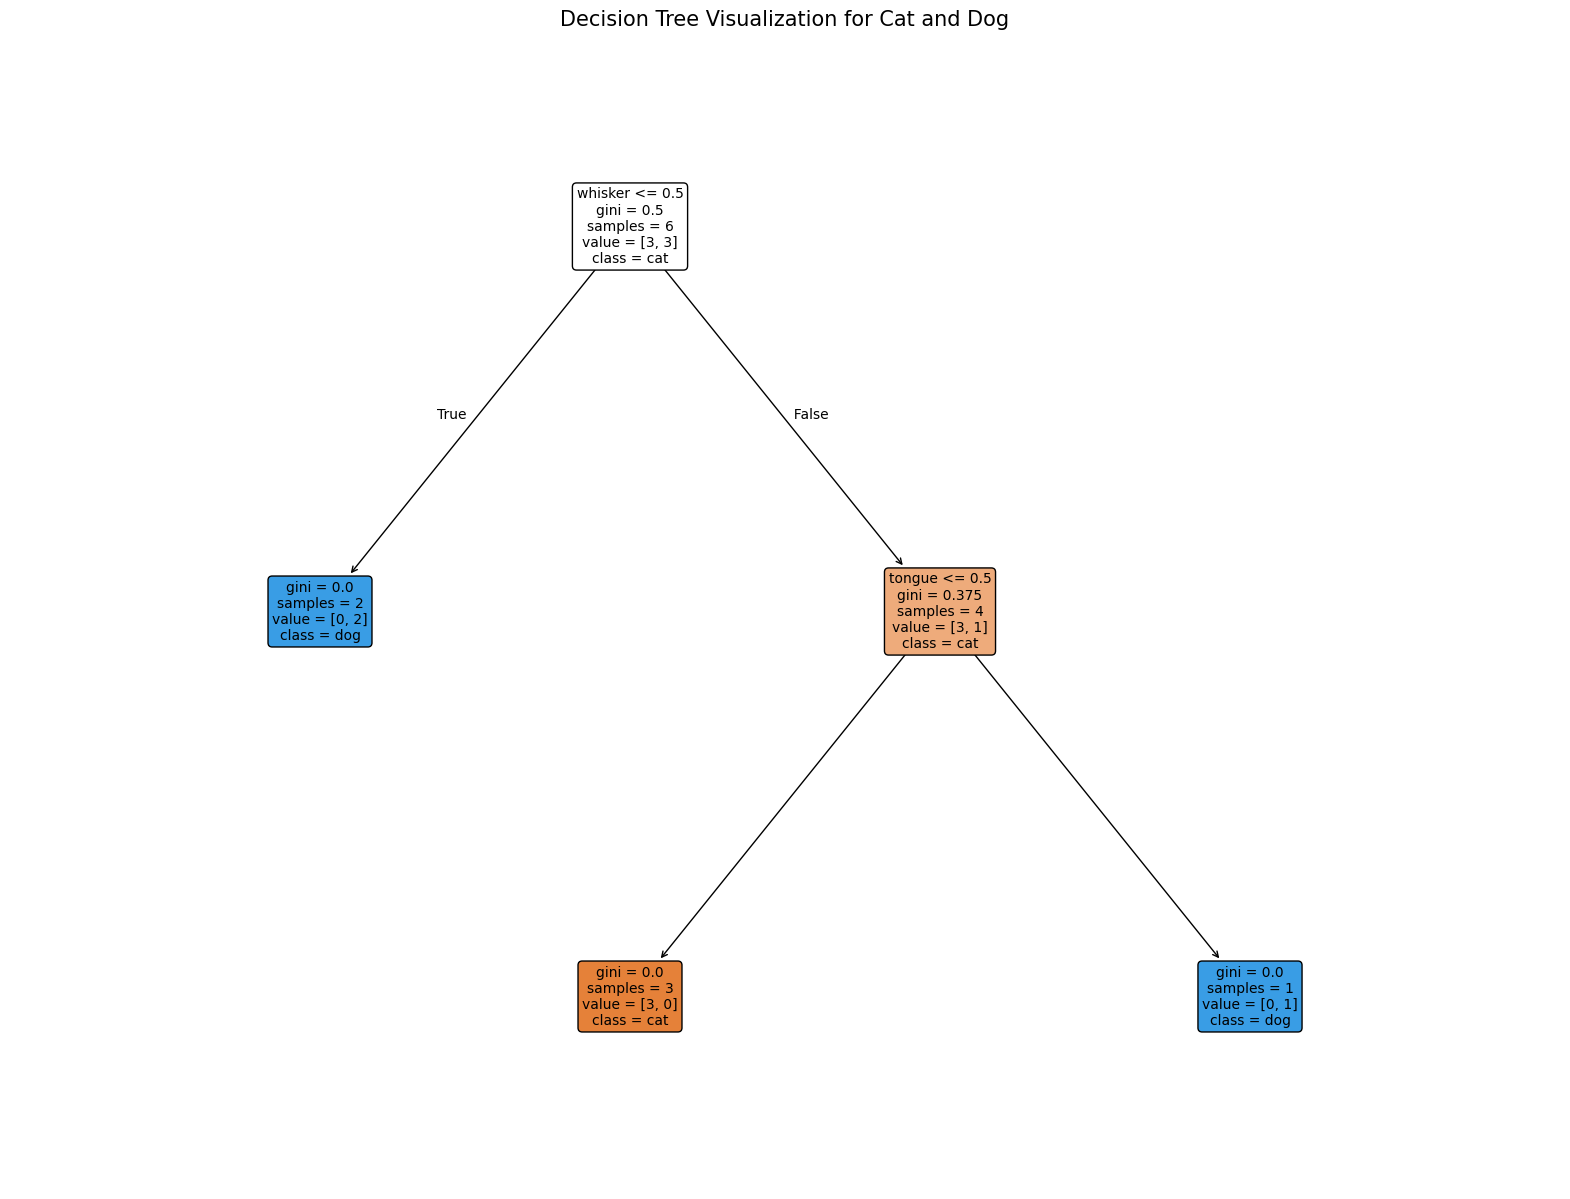

In [22]:
# นำเข้า Library สำหรับวาดต้นไม้
# ส่งโมเดลให้กับ Library สำหรับวาดต้นไม้ (plot_tree) (5 คะแนน)
# ปรับแต่งกราฟที่ได้ให้สวยงาม

import matplotlib.pyplot as plt
from sklearn.tree import plot_tree # Import plot_tree from sklearn.tree

# Create a figure and an axes object for better visualization
plt.figure(figsize=(20, 15)) # Adjust figure size as needed for better readability
plot_tree(model, feature_names=features_name, class_names=label_encoder.classes_, filled=True, rounded=True, fontsize=10)
plt.title("Decision Tree Visualization for Cat and Dog", fontsize=15)
plt.show()

In [20]:
# วาดต้นไม้ในลักษณะที่แสดงเป็นข้อความ (export_text) ที่คนทั่วไปสามารถเข้าใจได้ (5 คะแนน)
from sklearn import tree
tree_result = tree.export_text(model)   # แสดง Data Visualization ของแบบจำลองด้วย Tree: model
print(tree_result)

|--- feature_4 <= 0.50
|   |--- class: 1
|--- feature_4 >  0.50
|   |--- feature_3 <= 0.50
|   |   |--- class: 0
|   |--- feature_3 >  0.50
|   |   |--- class: 1

